#here we will use to concept of transfer learning and train our model using MobileNet model

In [1]:
%pip install kaggle

In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the dog vs cat dataset from kaggle

In [3]:
# Kaggle Api
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:07<00:00, 181MB/s]
100% 812M/812M [00:07<00:00, 119MB/s]


In [4]:
#command to list all the files in the directory
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted!')

The dataset is extracted!


In [6]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted!')

The dataset is extracted!


In [7]:
import os
#counting the number of files in train folder
path , dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ',file_count)

Number of images:  25000


Printing the name of the images

In [9]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.364.jpg', 'cat.8774.jpg', 'cat.10152.jpg', 'dog.2769.jpg', 'dog.3868.jpg', 'cat.6962.jpg', 'dog.9579.jpg', 'cat.2490.jpg', 'dog.997.jpg', 'cat.5922.jpg', 'cat.8065.jpg', 'cat.516.jpg', 'cat.5962.jpg', 'dog.1376.jpg', 'dog.2155.jpg', 'cat.4212.jpg', 'cat.3899.jpg', 'cat.12457.jpg', 'dog.3627.jpg', 'cat.2294.jpg', 'dog.5691.jpg', 'dog.4714.jpg', 'cat.1243.jpg', 'cat.4680.jpg', 'cat.799.jpg', 'dog.5694.jpg', 'dog.11889.jpg', 'dog.4035.jpg', 'cat.2679.jpg', 'dog.9856.jpg', 'cat.9556.jpg', 'dog.7888.jpg', 'dog.7143.jpg', 'cat.4340.jpg', 'dog.3595.jpg', 'cat.8916.jpg', 'cat.3862.jpg', 'dog.8553.jpg', 'cat.673.jpg', 'dog.10198.jpg', 'dog.1844.jpg', 'dog.5980.jpg', 'dog.4600.jpg', 'dog.11476.jpg', 'dog.8549.jpg', 'dog.4811.jpg', 'dog.7813.jpg', 'dog.9480.jpg', 'dog.9498.jpg', 'cat.4919.jpg', 'cat.4134.jpg', 'cat.1809.jpg', 'cat.12191.jpg', 'dog.3290.jpg', 'dog.3227.jpg', 'dog.11134.jpg', 'cat.6553.jpg', 'cat.3730.jpg', 'dog.2871.jpg', 'cat.10211.jpg', 'cat.12017.jpg', 'cat.10084.jpg', 'c

Importing dependencies (libraries required)

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

displaying the images of dogs and cats

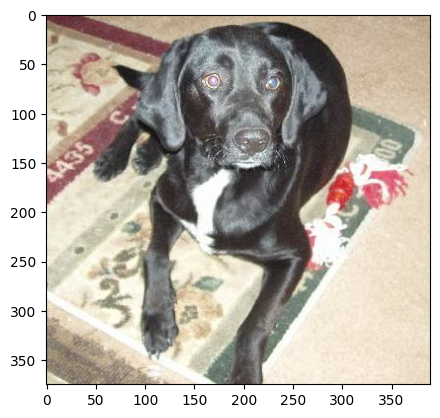

In [11]:
#display dog image
img = mpimg.imread('/content/train/dog.4587.jpg')
imgplt = plt.imshow(img)
plt.show()


displaying the image of a cat

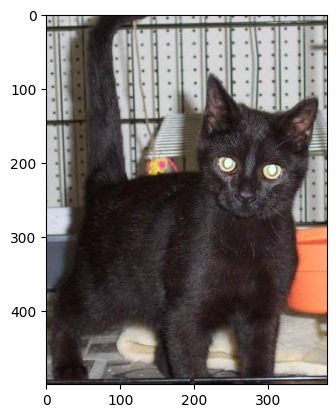

In [12]:
#display cat image
img = mpimg.imread('/content/train/cat.12140.jpg')
imgplt = plt.imshow(img)
plt.show()

In [13]:
#finding out how many dog and cat images are there in this dataset
#basic idea
file_names = os.listdir('/content/train')

for i in range(5):
  name = file_names[i]
  print(name[0:3])


cat
cat
cat
dog
dog


In [14]:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0
for img_file in file_names:
  name = img_file[0:3]
  if (name == 'dog'):
    dog_count += 1
  else:
    cat_count += 1
print('Number of dog images = ',dog_count)
print('Number of cat images = ',cat_count)


Number of dog images =  12500
Number of cat images =  12500


all the images are of different size so we need to resize the shape so that all of them are in the same dimension. We can convert them in into grayscale images as well so that it will take less time to train the model but here we will go with RGB images

Resizing all the images

In [15]:
#creating a directory for resized images
os.mkdir('/content/image_resized')

original_folder = '/content/train/'
resized_folder = '/content/image_resized/'
for i in range(2000):
  file_name = os.listdir(original_folder)[i]
  img_path = original_folder + file_name

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + file_name
  img.save(newImgPath)


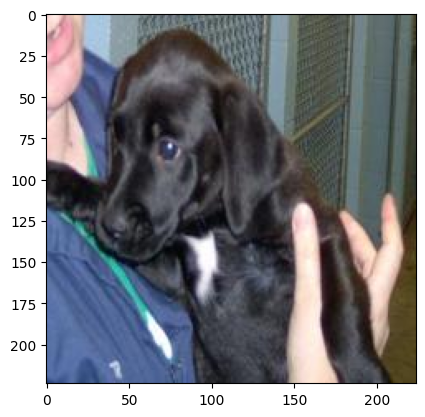

In [22]:
#display resized dog image
img = mpimg.imread('/content/image_resized/dog.2769.jpg')
imgplt = plt.imshow(img)
plt.show()

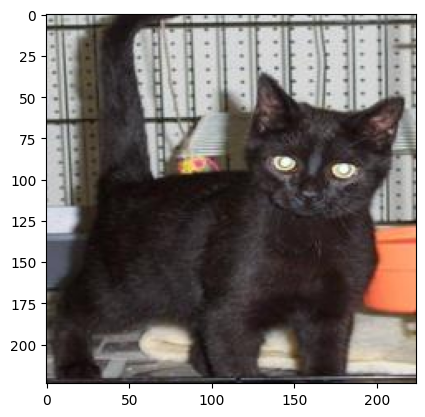

In [ ]:
#display resized cat image
img = mpimg.imread('/content/image_resized/cat.12140.jpg')
imgplt = plt.imshow(img)
plt.show()

creating labels for resized images of dogs and cats
Cats -> 0
Dog -> 1

In [19]:
filenames = os.listdir('/content/image_resized')
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if(label == 'dog'):
    labels.append(1)
  else:
    labels.append(0)

In [20]:
print(filenames[0:5])
print(len(filenames))

['cat.364.jpg', 'cat.8774.jpg', 'cat.10152.jpg', 'dog.2769.jpg', 'dog.3868.jpg']
2000


In [29]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 1]
2000


In [30]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1012  988]


Converting the images into numpy arrays

In [40]:
import cv2
import glob #The glob library in Python helps you find files and directories that match a specific pattern. It's like asking Python to find all files with a certain name or extension in a folder.
image_dir = '/content/image_resized/'
image_extension = ['png','jpg']
files = []
[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files]) #cv2.imread(file) will take the image and convert them into numpy array and np.asarray will take all the numpy arrays and convert them into a single numpy array



In [32]:
type(dog_cat_images)

numpy.ndarray

In [41]:
print(dog_cat_images)

[[[[ 94  96  97]
   [ 94  96  97]
   [ 94  96  97]
   ...
   [ 79  72  93]
   [ 79  72  93]
   [ 79  72  93]]

  [[ 94  96  97]
   [ 94  96  97]
   [ 94  96  97]
   ...
   [ 79  72  93]
   [ 79  72  93]
   [ 80  73  94]]

  [[ 94  96  97]
   [ 94  96  97]
   [ 94  96  97]
   ...
   [ 80  74  93]
   [ 80  74  93]
   [ 80  74  93]]

  ...

  [[ 73  65  76]
   [ 87  79  90]
   [100  90 103]
   ...
   [153 122 161]
   [148 117 154]
   [144 114 149]]

  [[ 61  56  65]
   [ 75  70  79]
   [ 89  81  92]
   ...
   [152 121 160]
   [146 115 152]
   [142 111 148]]

  [[ 56  51  60]
   [ 67  62  71]
   [ 79  71  82]
   ...
   [149 118 157]
   [144 113 150]
   [140 109 146]]]


 [[[162 214 231]
   [162 214 231]
   [163 215 232]
   ...
   [133 191 213]
   [119 177 199]
   [102 160 182]]

  [[161 213 230]
   [161 213 230]
   [161 213 230]
   ...
   [122 180 202]
   [108 166 188]
   [ 94 152 174]]

  [[161 213 230]
   [160 212 229]
   [159 211 228]
   ...
   [127 185 207]
   [121 179 201]
   [114 172

In [42]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [43]:
X = dog_cat_images #the dogs and cat images will be stored in this variable
Y = np.asarray(labels) #and the corresponding labels are stored in Y

Train Test Split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)


In [45]:
print(X.shape, X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 training images and 400 test images

In [48]:
#scaling the data i.e taking a value of a larger numerical range and making it to a numerical value of smaller range
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [51]:
print(X_train_scaled)

[[[[0.2745098  0.37254902 0.45098039]
   [0.27843137 0.37254902 0.44313725]
   [0.19215686 0.25490196 0.32156863]
   ...
   [0.67058824 0.71764706 0.73333333]
   [0.65882353 0.70588235 0.72156863]
   [0.65098039 0.69803922 0.71372549]]

  [[0.29411765 0.38823529 0.45882353]
   [0.31764706 0.40784314 0.47058824]
   [0.21568627 0.27843137 0.34117647]
   ...
   [0.65882353 0.70588235 0.72156863]
   [0.65098039 0.69803922 0.71372549]
   [0.63921569 0.68627451 0.70196078]]

  [[0.29803922 0.39215686 0.43921569]
   [0.34509804 0.43137255 0.47843137]
   [0.25490196 0.3254902  0.36862745]
   ...
   [0.65098039 0.69803922 0.71372549]
   [0.63921569 0.68627451 0.70196078]
   [0.63137255 0.67843137 0.69411765]]

  ...

  [[0.64705882 0.65882353 0.67843137]
   [0.63921569 0.65098039 0.67058824]
   [0.64705882 0.65882353 0.67843137]
   ...
   [0.32941176 0.33333333 0.34901961]
   [0.31764706 0.31764706 0.34117647]
   [0.32156863 0.32156863 0.34509804]]

  [[0.63529412 0.64705882 0.66666667]
   [0.6

In [52]:
print(X_test_scaled)

[[[[0.29803922 0.29803922 0.32156863]
   [0.29411765 0.29411765 0.31764706]
   [0.28627451 0.28627451 0.30980392]
   ...
   [0.34509804 0.34117647 0.34901961]
   [0.34117647 0.3372549  0.34509804]
   [0.34117647 0.3372549  0.34509804]]

  [[0.30980392 0.30980392 0.33333333]
   [0.30588235 0.30588235 0.32941176]
   [0.30196078 0.30196078 0.3254902 ]
   ...
   [0.34509804 0.34117647 0.34901961]
   [0.34117647 0.3372549  0.34509804]
   [0.34117647 0.3372549  0.34509804]]

  [[0.32156863 0.32156863 0.34509804]
   [0.32156863 0.32156863 0.34509804]
   [0.31764706 0.31764706 0.34117647]
   ...
   [0.34117647 0.3372549  0.34509804]
   [0.3372549  0.33333333 0.34117647]
   [0.3372549  0.33333333 0.34117647]]

  ...

  [[0.49019608 0.4745098  0.49803922]
   [0.16470588 0.14901961 0.17254902]
   [0.30980392 0.28235294 0.30196078]
   ...
   [0.08627451 0.04705882 0.01960784]
   [0.10980392 0.06666667 0.05098039]
   [0.07058824 0.02352941 0.01568627]]

  [[0.4745098  0.45882353 0.48235294]
   [0.2

Building the Neural Network

In [54]:
#we are going to use a pre-trained mobile net
import tensorflow as tf
import tensorflow_hub as hub

In [57]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable = False)
#Uses TensorFlow Hub's KerasLayer to load the pre-trained MobileNetV2 model.
#input_shape=(224,224,3): Specifies the expected input shape for the model. In this case, it's set to (224, 224, 3), which is a common size for images (224x224 pixels with 3 color channels for red, green, and blue).
#trainable=False: Freezes the weights of the pre-trained model, meaning that during training, these weights will not be updated. This is common when using transfer learning to leverage pre-trained models.

In [58]:
num_of_classes = 2 #here its cats and dogs
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2) #2 because we have only 2 classes and tf.keras.layers.Dense is the output layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


compiling the model

In [61]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['acc']
)
#This type of loss function is suitable for classification tasks where the goal is to predict one of several classes, and the target labels are integers representing the class indices. The from_logits=True setting is used when the model's output is in the form of raw logits(" refer to the unnormalized output values produced by the last layer of a network before applying a softmax activation function.)

In [62]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 57s 1s/step - loss: 0.2542 - acc: 0.9000
Epoch 2/5
50/50 [==============================] - 52s 1s/step - loss: 0.0692 - acc: 0.9825
Epoch 3/5
50/50 [==============================] - 52s 1s/step - loss: 0.0503 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 49s 983ms/step - loss: 0.0434 - acc: 0.9887
Epoch 5/5
50/50 [==============================] - 48s 956ms/step - loss: 0.0339 - acc: 0.9906


In [63]:
score, acc = model.evaluate(X_test_scaled, Y_test) #the model will predict the X_test_scaled_labels and that will be compared with the Y_test labels)
print('Test loss = ',score)
print('Test Accuracy = ',acc)

13/13 [==============================] - 13s 956ms/step - loss: 0.0679 - acc: 0.9775
Test loss =  0.06790736317634583
Test Accuracy =  0.9775000214576721


Building a predictive system

Path of the image to be predicted: /content/test.png


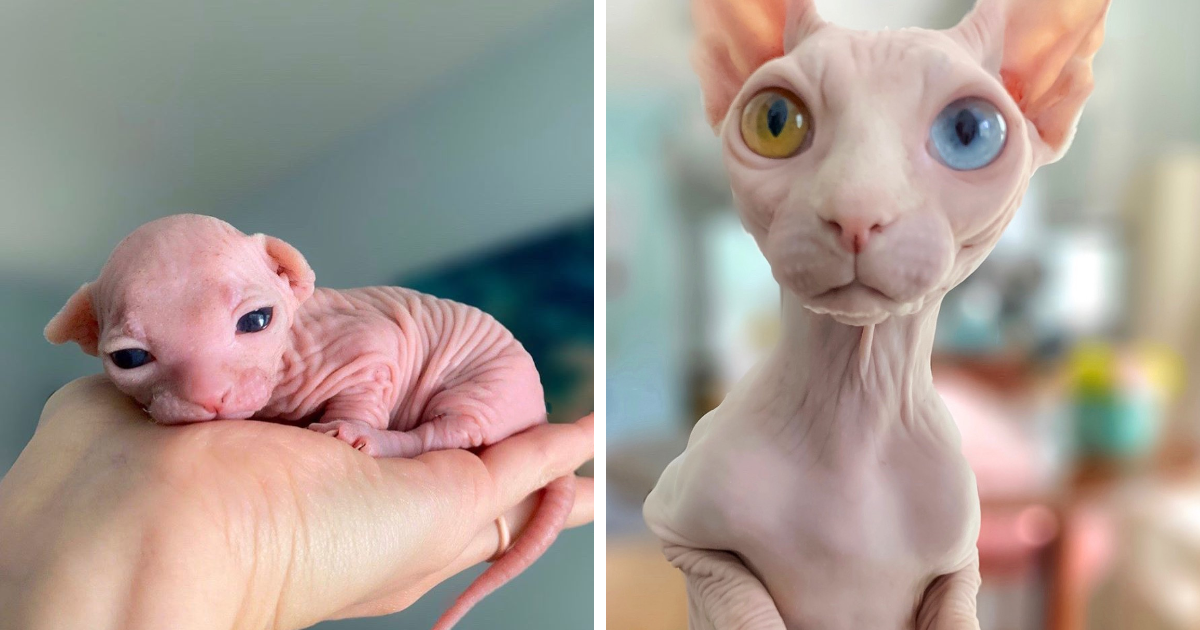

1/1 [==============================] - 0s 74ms/step
The image is of a cat


In [70]:
input_image_path = input('Path of the image to be predicted: ')

#reading the path of the image
input_image = cv2.imread(input_image_path)

#displaying the image
cv2_imshow(input_image)

#resizing the image
input_image_resize = cv2.resize(input_image, (224,224))

#scaling the image
input_image_scaled = input_image_resize/255

#reshaping the numpyarray which tells the model that we are making prediction to only one image with so and so dimension at a time
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

#final prediction
input_prediction = model.predict(image_reshaped) #this will be in the form of probabilities

input_pred_label = np.argmax(input_prediction) #this will see which probability is maximum and based on that it will tell if its dog or cat

if(input_pred_label == 1):
  print("The image is of a dog")
else:
  print("The image is of a cat")